In [16]:
import numpy as np
import pandas as pd
from kmeans import KMeans
from sklearn.cluster import KMeans as SKKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('../dataset/K_Means/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [18]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [32]:
X = df.iloc[:, 1:].values
kmeans = KMeans(n_clusters=3, max_iters=100)
kmeans.fit(X)
labels = kmeans.predict(X)
print("Cluster labels:", labels)

Cluster labels: [1 1 1 1 2 2 1 0 0 1 2 2 1 2 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 2 1 1 1
 1 1 1 1 2 2 2 0 1 1 1 1 2 1 2 1 0 0 1 1 1 0 1 2 1 1 1 1 1 1 2 0 1 1 1 1 0
 2 2 1 0 1 2 1 1 0 1 1 2 1 1 1 2 2 0 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0
 2 1 1 0 2 1 1 1 1 1 2 2 0 1 2 1 1 2 1 1 2 1 0 2 2 1 1 2 2 1 1 1 1 0 0 1 1
 1 1 1 1 1 2 1 1 1 0 0 0 2 1 1 2 1 1 1]


In [35]:
kmeans_sk = SKKMeans(n_clusters=3, n_init=10, max_iter=100, random_state=42)
kmeans_sk.fit(X)
labels_sk = kmeans_sk.predict(X)
print("Cluster labels (sklearn):", labels_sk)

Cluster labels (sklearn): [1 1 1 1 1 1 1 2 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2
 2 2 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2
 2 1 1 0 2 1 1 1 1 1 1 2 0 1 1 1 1 2 1 1 1 1 0 1 2 1 1 2 2 1 1 1 1 2 0 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1]


In [36]:
names = df.iloc[:, 0].astype(str).values

# project to 2D 
if X.shape[1] > 2:
    pca = PCA(n_components=2)
    X2 = pca.fit_transform(X)
    centroids2 = pca.transform(kmeans.centroids)
else:
    X2 = X.copy()
    centroids2 = kmeans.centroids.copy()

C:\Users\28686\AppData\Local\Temp\ipykernel_154340\1546382062.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


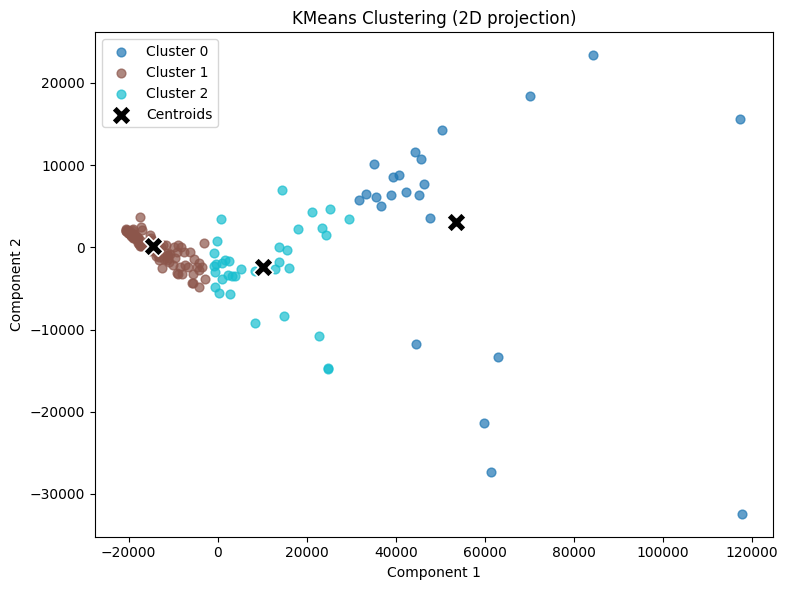

In [38]:
plt.figure(figsize=(8,6))
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for i, lab in enumerate(unique_labels):
    pts = X2[labels == lab]
    plt.scatter(pts[:,0], pts[:,1], s=40, color=colors(i), label=f'Cluster {lab}', alpha=0.7)

plt.scatter(centroids2[:,0], centroids2[:,1], marker='X', s=200, color='k', edgecolor='w', linewidth=1.2, label='Centroids')

plt.title('KMeans Clustering (2D projection)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\28686\AppData\Local\Temp\ipykernel_154340\3084705838.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels_sk))


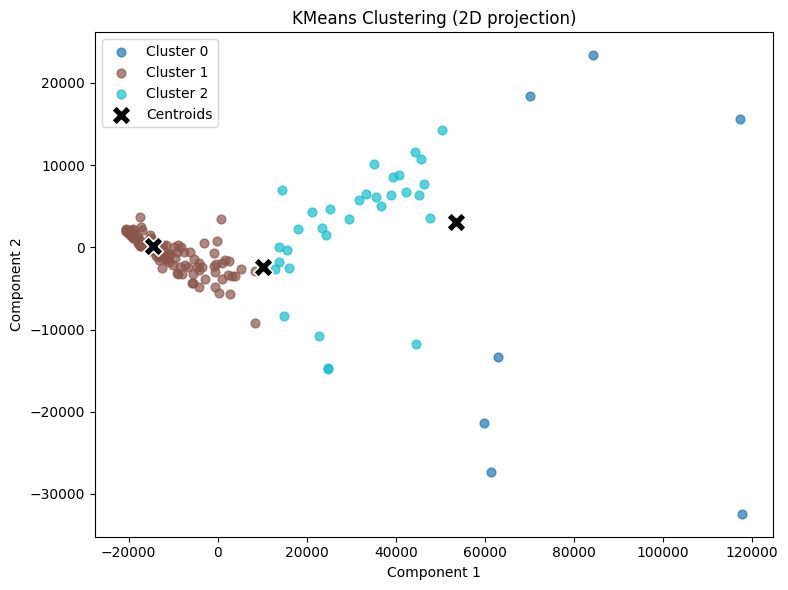

In [39]:
plt.figure(figsize=(8,6))
unique_labels_sk = np.unique(labels_sk)
colors = plt.cm.get_cmap('tab10', len(unique_labels_sk))

for i, lab in enumerate(unique_labels_sk):
    pts = X2[labels_sk == lab]
    plt.scatter(pts[:,0], pts[:,1], s=40, color=colors(i), label=f'Cluster {lab}', alpha=0.7)

plt.scatter(centroids2[:,0], centroids2[:,1], marker='X', s=200, color='k', edgecolor='w', linewidth=1.2, label='Centroids')

plt.title('KMeans Clustering (2D projection)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.tight_layout()
plt.show()